In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#n_cluster=3, 3개 그룹으로 군집화
#k-means++, 초기 중심 설정 방식
#max_iter=300, 최대 반복 횟수
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [6]:
#속성값 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [3]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
#분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑 됐음.
#Target1값 데이터는 3개만 군집으로 그루핑 됐고 나머지 47개는 전부 0으로 그루핑

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [4]:
#데이터 속성이 4개인데 이것을 2차원의 평면 위에 표현하기에 맞지 않으므로 pca로 차원축소
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


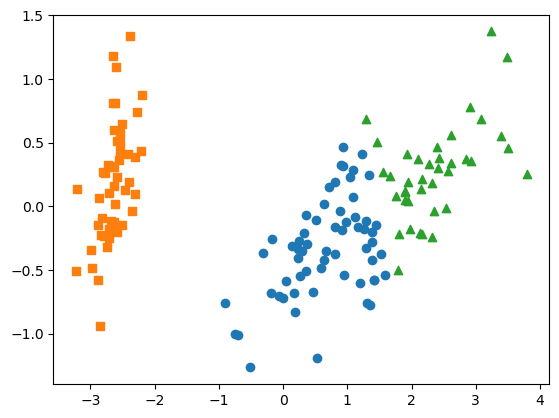

In [5]:
#2차원의 평면 위에 나타내기 위해 각각 다른 마커 표시
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
import matplotlib.pyplot as plt
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출, 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #피처 데이터 세트와 타깃 ㅔㄷ이터 세트가 튜플로 반환됨.
#n_samples = 생성할 총 데이터 개수
#n_features = 데이터의 피처 개수
#centers = 군집의 개수
#cluster_std = 생성될 군집 데이터의 표준 편차 
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8,random_state=0)
print(X.shape, y.shape)

#고유값들을 세어준 것
#unique는 고유한 열, counts는 고유한 값
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [7]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


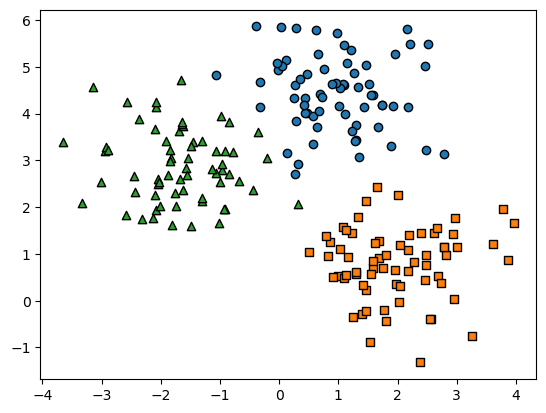

In [8]:
#3개의 군집 영역으로 구분한 데이터 세트를 생성했다는 것을 보여주기 위해...
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k', marker=markers[target])

In [9]:
#KMeans 객체를 이용해 x데이터를 K-Means 클러스터링 수행 
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


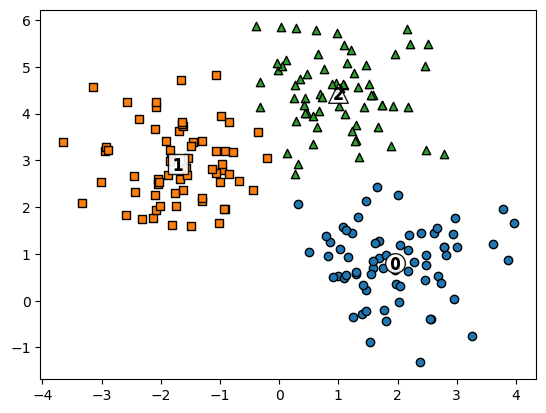

In [10]:
markers=['o','s','^','P','D','H','X']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

#군집별 중심 위치 좌표 시각화
    #s= 점의크기, edgecolor = 점의 테두리 색상
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color= 'white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [12]:
#비지도 학습의 성능 평가 방법 : 실루엣 분
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster']) #x데이터와 레이블값
print('silhouette_samples() return 값의 shape', score_samples.shape)

#전체적인 모델의 실루엣 계수 점수
irisDF['silhouette_coeff']=score_samples
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [14]:
#군집별 평균 실루엣 계수 값 구하기
#군집 칼럼별로 group by 하여 silhouette_coeff 칼럼의 평균 값 구하기
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

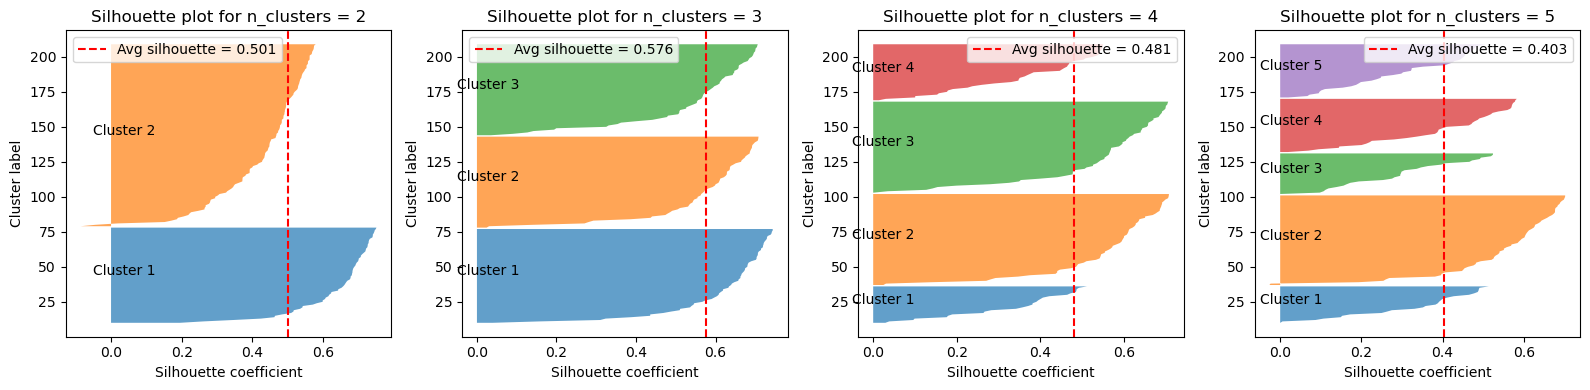

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

def visualize_silhouette(cluster_range, X_features):
    # 그래프 한 행에 4개씩 표시
    n_plots = len(cluster_range)
    n_cols = 4
    n_rows = (n_plots + n_cols - 1) // n_cols  # 필요한 행의 수 계산
    
    plt.figure(figsize=(16, 4 * n_rows))  # 전체 figure 크기 설정
    
    for idx, n_clusters in enumerate(cluster_range):
        # KMeans 모델을 군집 개수에 맞게 학습시킵니다.
        kmeans = KMeans(n_clusters=n_clusters, random_state=1)
        kmeans.fit(X_features)
        
        cluster_labels = kmeans.labels_
        
        # 전체 실루엣 점수 평균 계산
        silhouette_avg = silhouette_score(X_features, cluster_labels)
        
        # 각 샘플에 대한 실루엣 점수 계산
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)
        
        # 서브플롯 위치 계산
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.title(f"Silhouette plot for n_clusters = {n_clusters}")
        
        y_lower = 10
        for i in range(n_clusters):
            # 해당 군집에 속하는 샘플들의 실루엣 값
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            plt.fill_betweenx(np.arange(y_lower, y_lower + size_cluster_i),
                              0, ith_cluster_silhouette_values, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i + 1}")
            y_lower += size_cluster_i
        
        # 평균 실루엣 계수를 빨간색 점선으로 표시
        plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg silhouette = {silhouette_avg:.3f}")
        plt.xlabel("Silhouette coefficient")
        plt.ylabel("Cluster label")
        plt.legend()

    plt.tight_layout()  # 서브플롯 간 간격 자동 조정
    plt.show()

# 예시 사용법
visualize_silhouette([2, 3, 4, 5], X)



In [16]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))
#너무 세분화되어 군집화되어... bandwidth 살짝 높이기 = h 높이기                                     

cluster labels 유형: [0 1 2 3 4 5]


In [17]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [18]:
#최적화된 bandwidth 값을 찾기 위한 함수 제공
from sklearn.cluster import estimate_bandwidth
bandwidth=estimate_bandwidth(X) #데이터 세트 입력
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [19]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
best_bandwidth=estimate_bandwidth(X) #찾아주고 
meanshift=MeanShift(bandwidth=best_bandwidth) #직접 대입해서 수행
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [20]:
unique_labels=np.unique(cluster_labels)
unique_labels

array([0, 1, 2], dtype=int64)

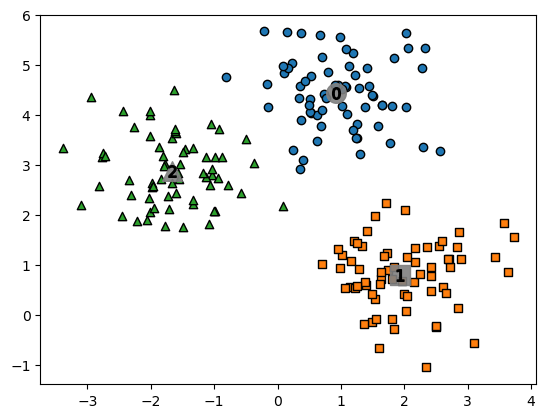

In [21]:
#시각화
import matplotlib.pyplot as plt
clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$' % label)


In [22]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterer, clusterDF, label_column, iscenter=True):
    """
    클러스터 결과를 시각화하는 함수.

    Parameters:
    - clusterer: 클러스터링 객체 (예: KMeans 객체). None일 경우 클러스터 중심을 표시하지 않음.
    - clusterDF: 클러스터링 대상 데이터가 포함된 DataFrame.
    - label_column: 클러스터 레이블이 저장된 열 이름.
    - iscenter: 클러스터 중심 표시 여부 (True일 때 표시).

    Returns:
    - None. 그래프를 출력.
    """
    # 클러스터 라벨에 따른 데이터 분포를 표시
    unique_labels = np.unique(clusterDF[label_column])
    markers = ['o', 's', '^', 'x', 'v']

    for label in unique_labels:
        label_data = clusterDF[clusterDF[label_column] == label]
        plt.scatter(label_data['ftr1'], label_data['ftr2'], s=50, marker=markers[label], label=f'Cluster {label}')

    # 클러스터 중심을 표시
    if iscenter and clusterer is not None:
        centers = clusterer.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], s=250, c='red', marker='*', label='Centroids')

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Plot')
    plt.show()


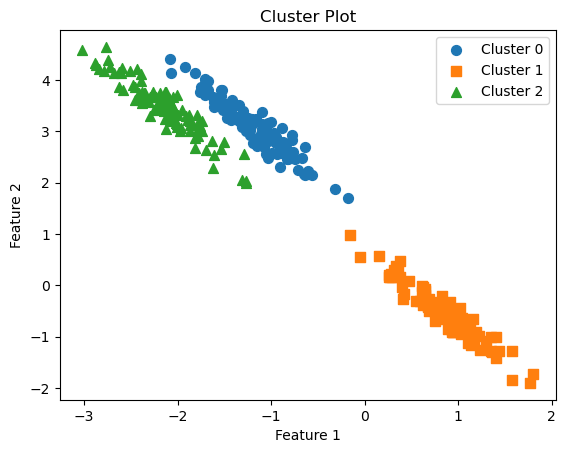

In [34]:
#k-means 군집화 방식이 데이터가 길쭉하게 분포하는 곳에선 낫굿
from sklearn.datasets import make_blobs
X, y =make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation=[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso=np.dot(X,transformation)

#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

In [31]:
import numpy
np.array(transformation)
#대각요소 1행1열 = x축 방향의 스케일링 요소, 확장 또는 축소 비율
        #2행 2열 =  y축 방향의 스케일링 요소, 확장 또는 축소 비율
#비대각요소 1행 2열 = y데이터가 x축에 얼마나 가까이 갈지...
        #2행 1열 = x데이터가 y축에 얼마나 가까이 갈지...

array([[ 0.60834549, -0.63667341],
       [-0.40887718,  0.85253229]])

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


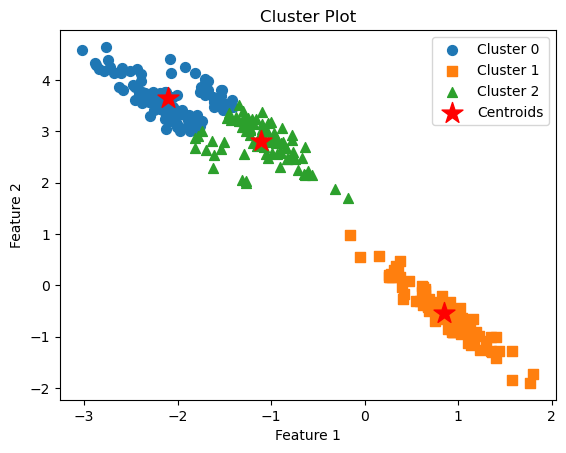

In [35]:
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


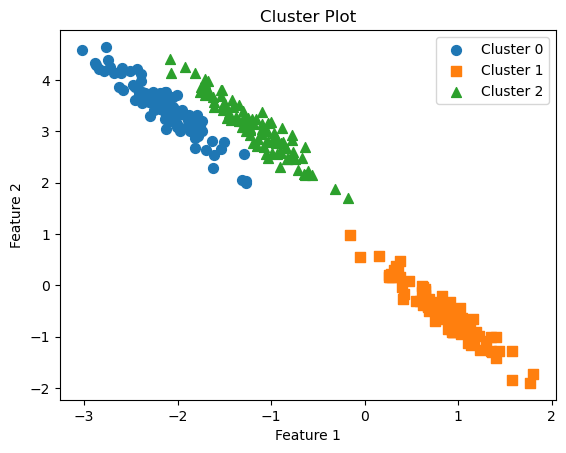

In [38]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로...
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

In [39]:
#각각의 군집 label값을 비교해 위와 같은 데이터 세트에서의 군집화 효율 차이 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### KMeans Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### KMeans Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


In [43]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
#cluster가 -1인 것은 노이즈 포인트를 의미함.

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


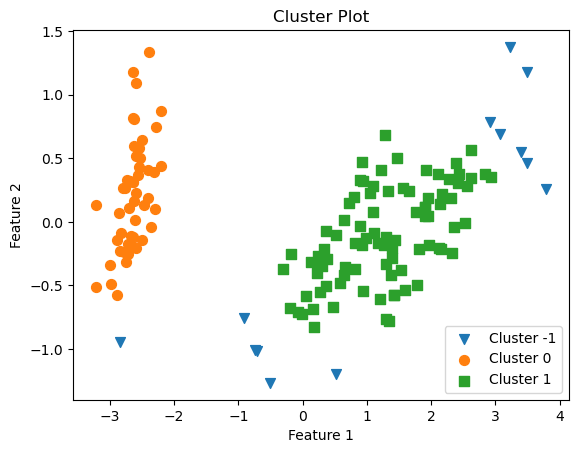

In [48]:
#시각화
from sklearn.decomposition import PCA
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visual cluster plot함수가 칼럼을 좌표에 표현하므로 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_2d(df, cluster_column, iscenter=False):
    """
    2차원 클러스터 결과를 시각화하는 함수.

    Parameters:
    - df: 클러스터링 대상 데이터가 포함된 DataFrame.
    - cluster_column: 클러스터 레이블이 저장된 열 이름.
    - iscenter: 클러스터 중심 표시 여부 (DBSCAN에는 클러스터 중심이 없으므로 사용되지 않음).

    Returns:
    - None. 그래프를 출력.
    """
    unique_clusters = np.unique(df[cluster_column])
    markers = ['o', 's', '^', 'x', 'v', 'D', 'h', '*', '+', 'p']

    for cluster in unique_clusters:
        # -1 클러스터는 노이즈로 간주하고 별도 색상으로 표시
        if cluster == -1:
            label_data = df[df[cluster_column] == cluster]
            plt.scatter(label_data.iloc[:, 0], label_data.iloc[:, 1], s=50, color='gray', marker='x', label='Noise')
        else:
            label_data = df[df[cluster_column] == cluster]
            plt.scatter(label_data.iloc[:, 0], label_data.iloc[:, 1], s=50, marker=markers[cluster % len(markers)], label=f'Cluster {cluster}')

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Cluster Plot')
    plt.show()


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


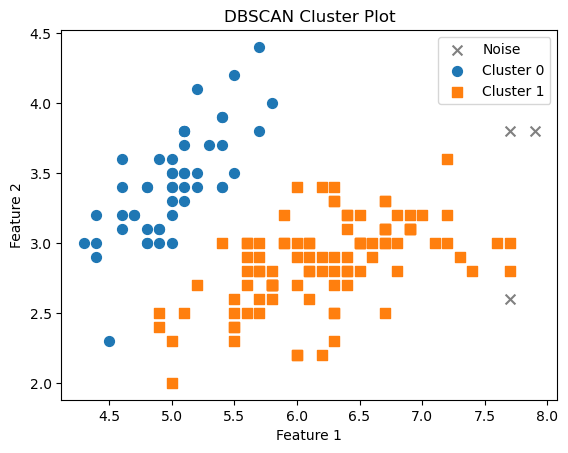

In [52]:
#eps 증가시키면 노이즈 데이터 수가 줄어든다...
dbscan=DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_2d(irisDF,'dbscan_cluster',iscenter=True)


target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


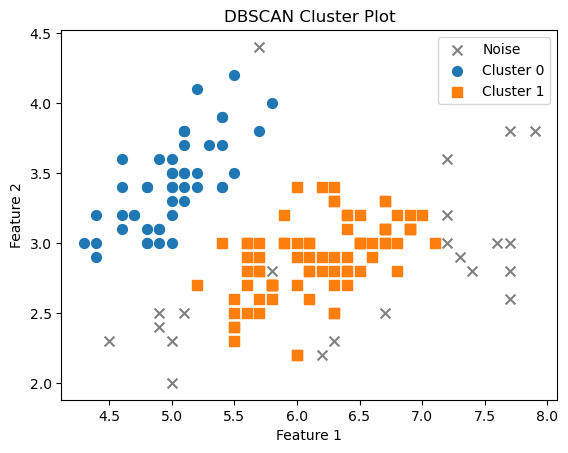

In [54]:
dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_2d(irisDF,'dbscan_cluster',iscenter=True)

In [ ]:
#Manhattan distance: metric='manhattan' (직각 경로의 거리 계산)
#Cosine similarity: metric='cosine' (벡터 간의 각도 차이로 유사도를 계산)
#Minkowski distance: metric='minkowski' (일반화된 거리 측정 방법으로, 
#p 값을 조정하여 유클리드 거리와 맨하탄 거리를 모두 포함할 수 있음)